# Телеком. Прогнозирование оттока клиентов

Задача научиться прогнозировать отток клиентов.

Источник https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn

## Изучение данных

### Загрузка и знакомство с данными

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [3]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [5]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
internet = pd.read_csv('/datasets/final_provider/internet.csv')
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [8]:
phone = pd.read_csv('/datasets/final_provider/phone.csv')
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [9]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


У нас 4 таблицы с различными данными по клиентам компании, которые можно объединить по общему полю customerID.  
Большинство данных представлено типом object, проверим, какие данные храняться в этих столбцах:

In [10]:
def uni(data):
    data_minus = data.drop('customerID', axis=1)
    for row in data_minus: 
        print(data_minus[row].unique())

In [11]:
uni(phone)

['No' 'Yes']


In [12]:
uni(internet)

['DSL' 'Fiber optic']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [13]:
uni(personal)

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']


In [14]:
for row in contract: 
      print(contract[row].value_counts())

4973-MGTON    1
6425-JWTDV    1
4710-NKCAW    1
3428-XZMAZ    1
6591-QGOYB    1
             ..
7826-VVKWT    1
3594-IVHJZ    1
2080-CAZNM    1
6235-VDHOM    1
2013-SGDXK    1
Name: customerID, Length: 7043, dtype: int64
2014-02-01    366
2019-10-01    237
2019-09-01    237
2019-11-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-12-01      3
2013-10-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
20.05     61
19.85     45
19.90     44
19.95  

В таблицах  personal, internet, phone все данные можно заменить на 0 и 1 для удобства анализа и обработки, в таблице contract так можно поступить с PaperlessBilling.

### Объединение данных

In [15]:
df = contract.merge(phone,on='customerID', how='outer')
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
print(len(df),len(contract))

7043 7043


In [17]:
df = df.merge(internet,on='customerID', how='outer')
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No


In [18]:
len(df)

7043

In [19]:
df = df.merge(personal,on='customerID', how='outer')
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No


In [20]:
len(df)

7043

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   MultipleLines     6361 non-null   object 
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  gender            7043 non-null   object 


### Подготовка данных для анализа

После объединения у нас получились отсутствующие значения у тех клиентов, кто не пользуются одним из сервисов.  
Создадим новые колонки, которые нам явно сообщают, чем клиент пользуется:

In [22]:
df['is_internet_user'] = df['InternetService'].notna()*1
df['is_phone_user'] = df['MultipleLines'].notna()*1
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,is_internet_user,is_phone_user
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,...,No,No,No,No,Female,0,Yes,No,1,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,...,Yes,No,No,No,Male,0,No,No,1,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,...,No,No,No,No,Male,0,No,No,1,1


Избавимся от NaN, заполним их No, для каждого поля это вполне логично означает отсутствие признака

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   MultipleLines     6361 non-null   object 
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  gender            7043 non-null   object 


In [24]:
df = df.fillna('No')
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,is_internet_user,is_phone_user
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL,...,No,No,No,No,Female,0,Yes,No,1,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,...,Yes,No,No,No,Male,0,No,No,1,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,...,No,No,No,No,Male,0,No,No,1,1


In [25]:
df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'is_internet_user',
       'is_phone_user'],
      dtype='object')

## Теперь избавимся от Yes/No  для удобства анализа

Изменим тип данных в колонке с датами для удобства анализа

In [26]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'])

Приведем к числовому типу TotalCharges, для этого 11 отсутствующих значений заменим на 0

In [27]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

Также нам сразу стоит выделить целевой признак:

In [28]:
df['churn'] = (df['EndDate'] != 'No')*1

Полезным для анализа и возможно для создания модели будет время жизни клинета.
Для оставшихся клиентов это будет дата сбора информации - февраль 2020 минус дата начала договора.

In [29]:
df['tenure'] = (pd.to_datetime(df['EndDate'].replace('No', '2020-02-01')) -\
               df['BeginDate']).dt.days

In [30]:
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,is_internet_user,is_phone_user,churn,tenure
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL,...,No,No,Female,0,Yes,No,1,0,0,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,...,No,No,Male,0,No,No,1,1,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,...,No,No,Male,0,No,No,1,1,1,61


In [31]:
def to_one_zero(data, columns):
    for column in columns:
        data[column] = data[column].map(dict(Yes=1, No=0))

Я не хочу сохранять это изменение в данный при создании модели, чтобы оставить начальные данные создам новую переменную

In [32]:
fg = df

In [33]:
fg = fg.set_index('customerID')

In [34]:
columns = ['PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies',
           'Partner', 'Dependents']
to_one_zero(df, columns)

In [35]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,is_internet_user,is_phone_user,churn,tenure
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,DSL,...,0,0,Female,0,1,0,1,0,0,31
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,0,DSL,...,0,0,Male,0,0,0,1,1,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,0,DSL,...,0,0,Male,0,0,0,1,1,1,61
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,DSL,...,0,0,Male,0,0,0,1,0,0,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,0,Fiber optic,...,0,0,Female,0,0,0,1,1,1,61


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   MultipleLines     7043 non-null   int64         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   int64         
 11  OnlineBackup      7043 non-null   int64         
 12  DeviceProtection  7043 non-null   int64         
 13  TechSupport       7043 non-null   int64         
 14  StreamingTV       7043 n

Мы объединили данные в одну таблицу, теперь можно посмотреть всю доступную информацию по каждому клиенту.
Для удобства анализа мы перевели Yes/No в 0/1
Также мы выделили признаки is_internet_user, is_phone_user, время жизни клиента tenure, и целевой - churn.

## Анализ данных

### Общий взгляд

Для начала посмотрим статистики по нашим данным:

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00
TechSupport,7043.0,0.290217,0.453895,0.00,0.00,0.00,1.00,1.00
StreamingTV,7043.0,0.384353,0.486477,0.00,0.00,0.00,1.00,1.00
StreamingMovies,7043.0,0.387903,0.487307,0.00,0.00,0.00,1.00,1.00


Мы видим:

90% клиентов пользуются телефонной связью, немногим меньше 78% интернетом, несложно посчитать, что 68% клиентом используют оба сервиса

- 48% наших клиентов имеют партнера
- 30% - имеют иждивенцев
- 16% - пенсионеры
- 38% - пользуются стриминговым телевидением
- 39% - смотрят фильмы
- 29% - пользуются тех поддержкой
- 34% - платят за антивирус
- 34% - пользуются нашим облаком
- 28% - пользуются блокировкой небезопасных сайтов 
- 42% - подключают телефонных аппарат к нескольким линиям
- 59% - предпочитаюи выставление счетов онлайн  

- 26% - ушли

В средем клиенты платят 65,76 в месяц

<AxesSubplot:>

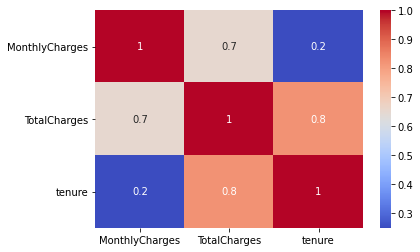

In [38]:
sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr(), annot=True, fmt = '.1g', cmap= 'coolwarm')

Из карты корреляций видна высокая корреляция TotalCharges с  tenure и MonthlyCharges.  
Вернемся к этому позже и примем решение.

### Анализ даты и времени пользования услугами

Теперь подробнее рассмотрим каждый показатель, начнем с даты начала обслуживания:

In [39]:
print('Месяц появления первых клиентов:',df['BeginDate'].min())
print('Последний месяц в наших данных:',df['BeginDate'].max())

Месяц появления первых клиентов: 2013-10-01 00:00:00
Последний месяц в наших данных: 2020-02-01 00:00:00


Дата начала дана по месяцам с октября 2013 г. по февраль 2020 г.

In [40]:
def plot(data, column):
    df_to_plot = data.groupby(column)['BeginDate'].count()
    plot = df_to_plot.plot(kind='bar', y=column,figsize = (15,5),  ec='black')
    plt.ylabel('Колличество клиентов')  
    plt.xlabel('Месяц')

Выделим для анализа ушедших клиентов:

In [41]:
df_churn = df.query('churn == 1')
df_churn.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,is_internet_user,is_phone_user,churn,tenure
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,0,DSL,...,0,0,Male,0,0,0,1,1,1,61
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,0,Fiber optic,...,0,0,Female,0,0,0,1,1,1,61
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,99.65,820.50,1,Fiber optic,...,1,1,Female,0,0,0,1,1,1,245


Text(0.5, 1.0, 'Распределение во времени по месяцам новых подключений')

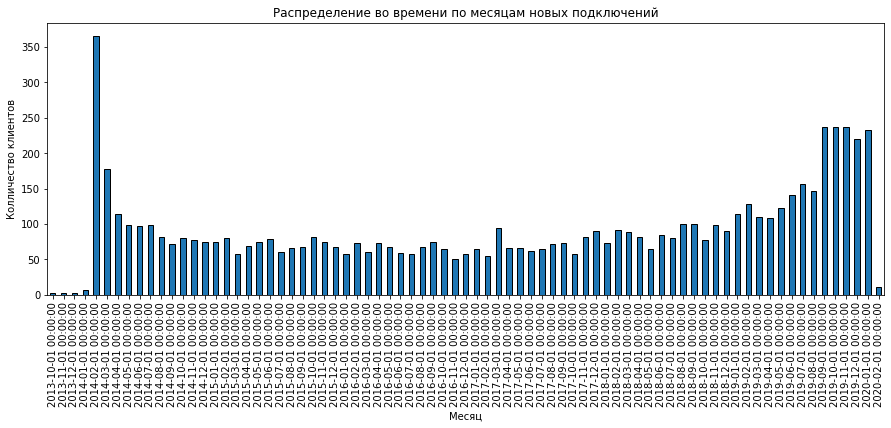

In [42]:
plot(df,'BeginDate')
plt.title('Распределение во времени по месяцам новых подключений')

Text(0.5, 1.0, 'Распределение во времени по месяцам новых подключений среди ушедших клиентов')

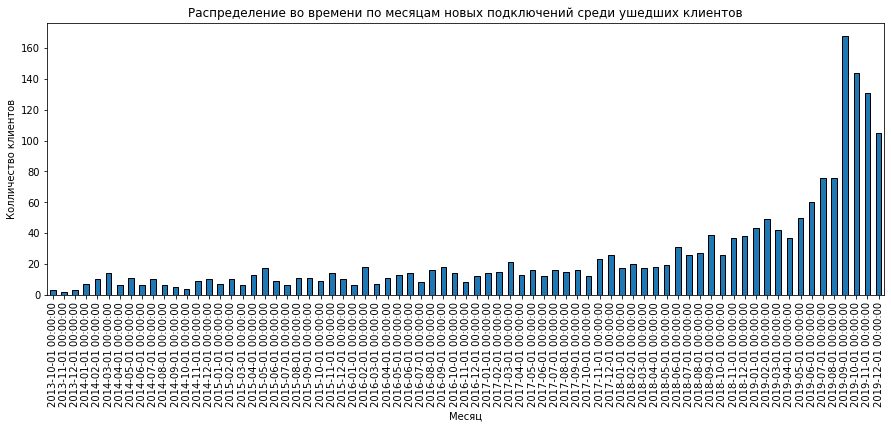

In [43]:
plot(df_churn,'BeginDate')
plt.title('Распределение во времени по месяцам новых подключений среди ушедших клиентов')

На распределениях можно заметить, что в конце 2019 года был всплеск привлеченных новых клиентов, и большинство из них ушли в ближайшие месяцы.
Необычно много клиентов было привлечено в феврале марте 2014 г. и большинство из них остались с компанией.
Можно будет потом изучить этих клиентов подробнее, чтобы выявить причину их лояльности, предположу, что была проведена маркетинговая акция с очень привлекательными тарифами, которые позже повысились для последующих клиентов.

In [44]:
df_churn['EndDate'] = pd.to_datetime(df_churn['EndDate'])

In [45]:
df_churn.groupby('EndDate')['BeginDate'].count()

EndDate
2019-10-01    458
2019-11-01    485
2019-12-01    466
2020-01-01    460
Name: BeginDate, dtype: int64

Text(0.5, 1.0, 'Распределение по месяцам ушедших клиентов')

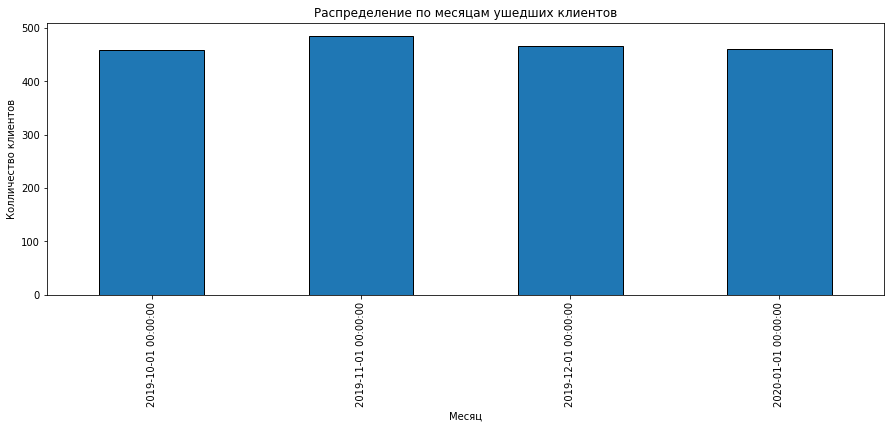

In [46]:
plot(df_churn,'EndDate')
plt.title('Распределение по месяцам ушедших клиентов')

Все клиенты ушли в последние 4 месяца перед сбором информации, возможно специально выбрали таких клиентов, или месяцы проставлены неверно. Не будем использовать эту информацию

In [47]:
df.tenure.max()

2191

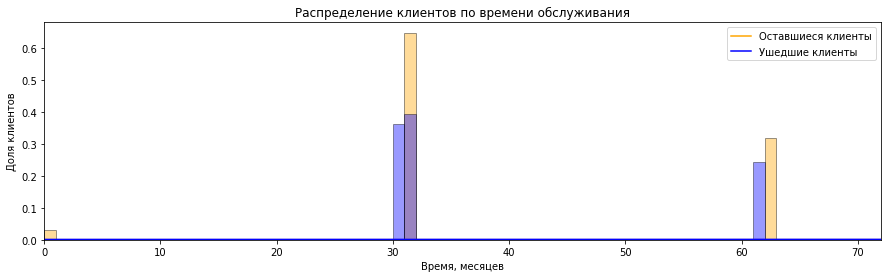

In [48]:
plt.figure(figsize=(15,4))
sns.distplot(df.query('churn != 1')['tenure'], hist=True, kde=True, 
             bins=np.linspace(0, 72, 73),color = 'orange',
             hist_kws={'edgecolor':'black'})
plt.title('Распределение клиентов по времени обслуживания')

sns.distplot(df_churn['tenure'], hist=True, kde=True, 
             bins=np.linspace(0, 72, 73),color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.legend(['Оставшиеся клиенты', 'Ушедшие клиенты'])
plt.xlim(0, 72)
plt.ylabel('Доля клиентов')
plt.xlabel('Время, месяцев');

Здесь очень хорошо видна зависимость факта ухода клиента от времени. Клиенты, что дольше обслуживаются, реже решают уйти. Очень много клиентов уходят после первого же месяца.

### Анализ числовых данных

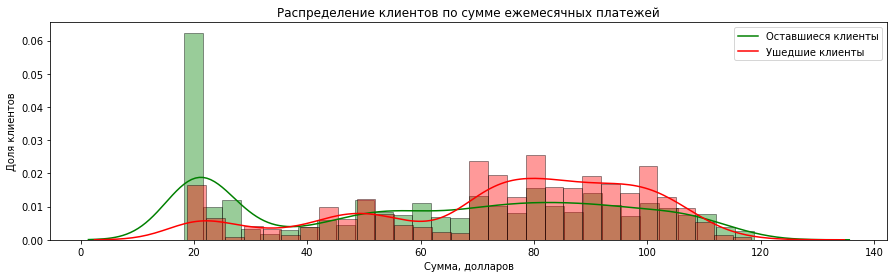

In [49]:
plt.figure(figsize=(15,4))
sns.distplot(df.query('churn != 1')['MonthlyCharges'], hist=True, kde=True, 
             bins=30,color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Распределение клиентов по сумме ежемесячных платежей')

sns.distplot(df_churn['MonthlyCharges'], hist=True, kde=True, 
             bins=30,color = 'red',
             hist_kws={'edgecolor':'black'})
plt.legend(['Оставшиеся клиенты', 'Ушедшие клиенты'])
plt.ylabel('Доля клиентов')
plt.xlabel('Сумма, долларов');

Видно, что в большой мере уходят клиенты с большим ежемесячным платежом
Распределения очень разные

In [50]:
df['TotalCharges'].corr(df['tenure']*df['MonthlyCharges'])

0.9995600907033263

TotalCharges полностью  зависит от текущей суммы ежемесячного платежа и срока обслуживания клиента.
Использовать этот признак совместно с tenure и MonthlyCharges не имеет смысла. Коэффициент корреляции это подтверждает.

### Анализ категориальных данных

In [51]:
def binary_ploting_distributions(col):
    fig = plt.figure(figsize=(15,4))

    ax_1 = fig.add_subplot(1,2, 1)

    plt.title('Оставшиеся клиенты')
    plt.pie(df.query('churn != 1').groupby(col)[col].count(),
            labels=[' ',col], explode = [0,0.1], autopct='%1.1f%%')
    plt.axis('equal')

    ax_2 = fig.add_subplot(1, 2, 2)
    plt.title('Ушедшие клиенты')
    plt.pie(df_churn.groupby(col)[col].count(),
            labels=[' ',col], explode = [0,0.1], autopct='%1.1f%%')
    plt.axis('equal');

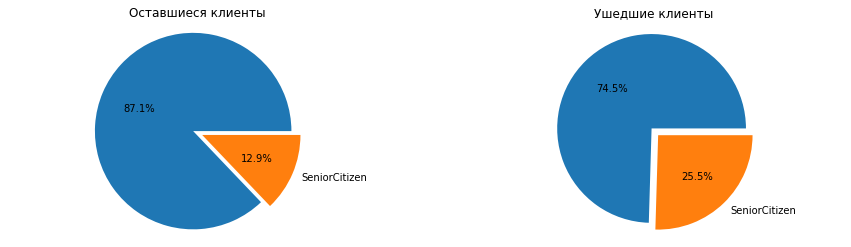

In [52]:
binary_ploting_distributions('SeniorCitizen')

Среди ушедших клиентов пенсионеров в 2 раза больше, чем среди оставшихся, фактор значимый

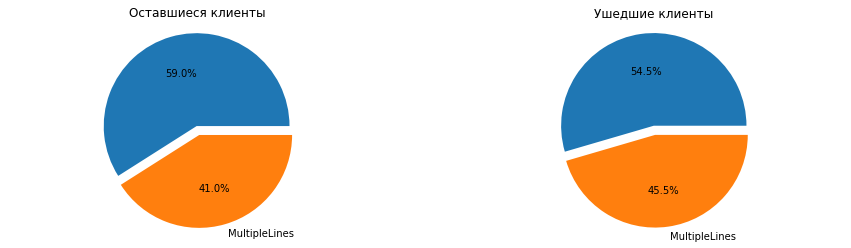

In [53]:
binary_ploting_distributions('MultipleLines')

Доля клиентов использующих на одном аппарате несколько линий среди ушедних клиентов отличается незначительно

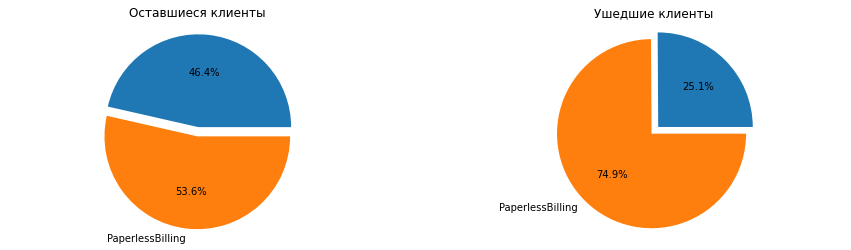

In [54]:
binary_ploting_distributions('PaperlessBilling')

Клиенты предпочитающие бумажные счета уходят значительно реже

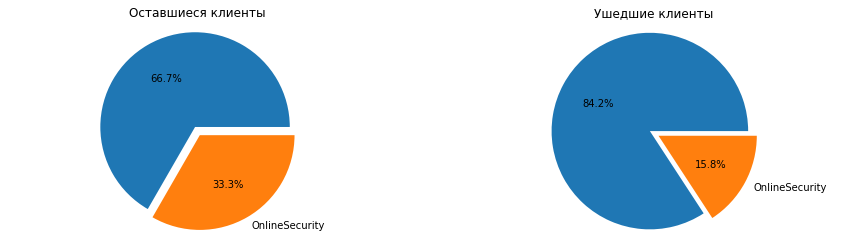

In [55]:
binary_ploting_distributions('OnlineSecurity')

Доля пользователей сервиса OnlineSecurity среди оставшихся в 2 раза выше, чем среди ушедших

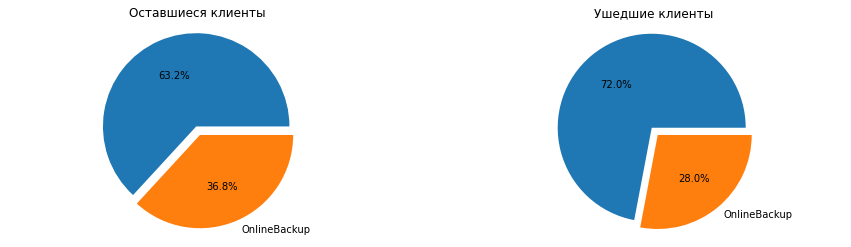

In [56]:
binary_ploting_distributions('OnlineBackup')

Облачным хранилищем чуть меньше пользовались ушедшие клиенты

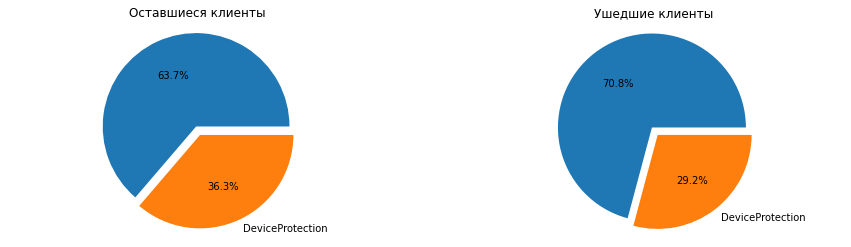

In [57]:
binary_ploting_distributions('DeviceProtection')

Такая же ситуация с антивирусом

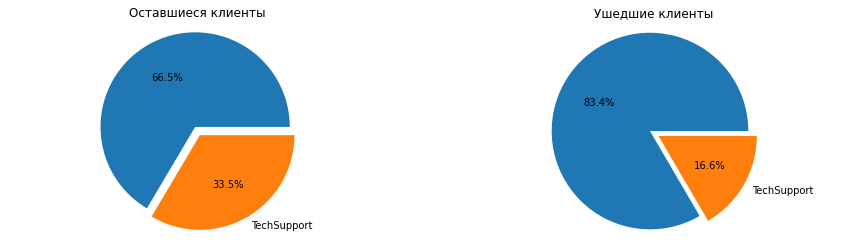

In [58]:
binary_ploting_distributions('TechSupport')

Клиенты обратившиеся в тех поддержку остаютсячаще

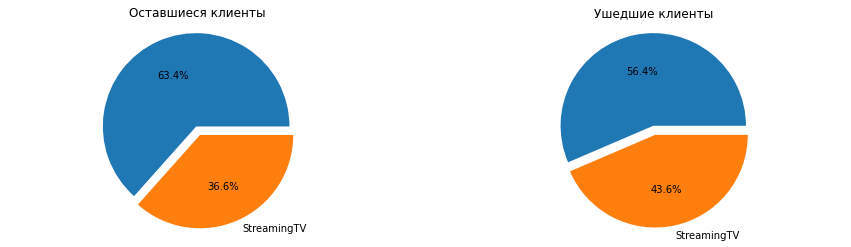

In [59]:
binary_ploting_distributions('StreamingTV')

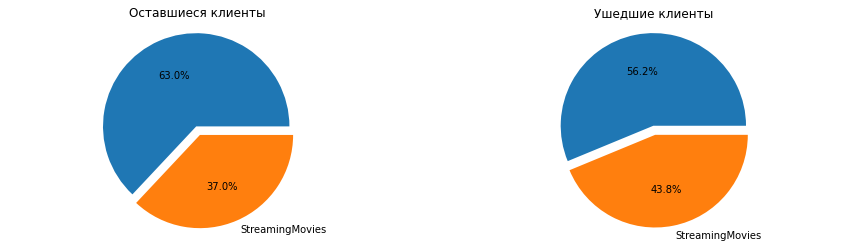

In [60]:
binary_ploting_distributions('StreamingMovies')

Клиенты пользующиеся телевидением и прокатом фильмов уходят лишь незначительно чаще

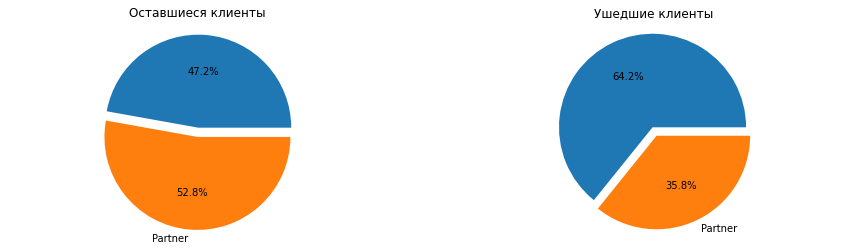

In [61]:
binary_ploting_distributions('Partner')

Клиенты с партнером остаются значительно чаще, возможно это связано с возрастом, они в среднем старше людей без партнера.

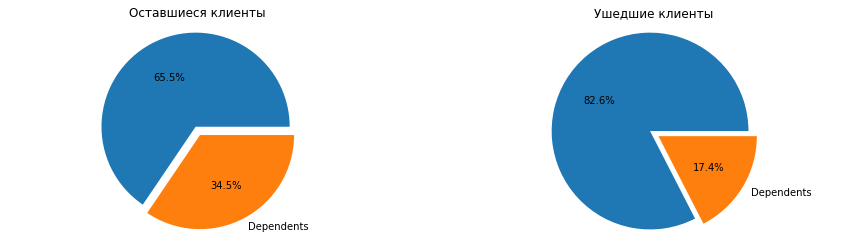

In [62]:
binary_ploting_distributions('Dependents')

Клиенты с детьми в 2 раза реже отказываются от услуг

In [63]:
churn_share = pd.DataFrame(df.pivot_table(index='Partner',columns= 'Dependents',values='churn',aggfunc=['mean']).reset_index())
churn_share.columns = ['Partner', 'Нет иждивенцев','Есть иждивенцы']
churn_share.index = ['Нет партнера','Есть партнер']
print('Доля ушедших клиентов от общего количества клиентов этой категории')
churn_share.drop('Partner', axis = 1)*100

Доля ушедших клиентов от общего количества клиентов этой категории


,Нет иждивенцев,Есть иждивенцы
Нет партнера,34.237805,21.329640
Есть партнер,25.408348,14.236707


Из таблицы мы видим, что каждый фактор влияет независимо и в совокупности клиенты с партнером и иждивенцами уходят более чем в 2 раза реже, оба фактора существенны

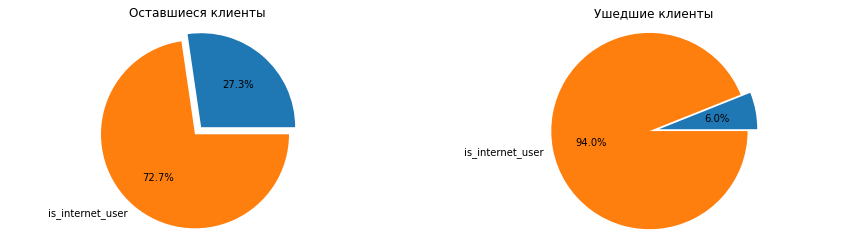

In [64]:
binary_ploting_distributions('is_internet_user')

Клиенты использующие исключительно телефонные сервисы в 4,5 раза реже отказываются от услуг, очень существенный фактор

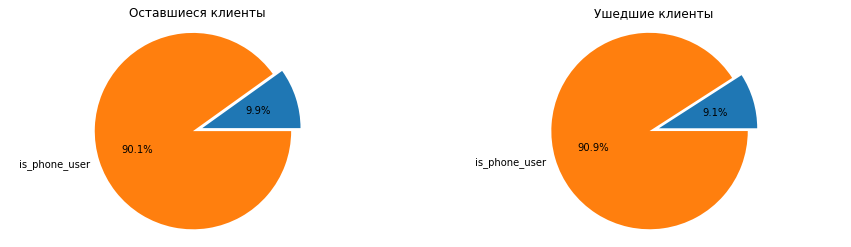

In [65]:
binary_ploting_distributions('is_phone_user')

Факт того что клиент пользуется только интернетом или обоими сервисами не влияет на отток

In [66]:
df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'is_internet_user',
       'is_phone_user', 'churn', 'tenure'],
      dtype='object')

In [67]:
df.groupby('Type')['BeginDate'].count()

Type
Month-to-month    3875
One year          1473
Two year          1695
Name: BeginDate, dtype: int64

In [68]:
df_for = pd.DataFrame(df.groupby('Type')['Type'].count())

In [69]:
def binary_ploting_distributions(col):
    fig = plt.figure(figsize=(15,4))

    ax_1 = fig.add_subplot(1,2, 1)

    plt.title('Оставшиеся клиенты')
    plt.pie(df.query('churn != 1').groupby(col)[col].count(),
            labels=[' ',col], explode = [0,0.1], autopct='%1.1f%%')
    plt.axis('equal')

    ax_2 = fig.add_subplot(1, 2, 2)
    plt.title('Ушедшие клиенты')
    plt.pie(df_churn.groupby(col)[col].count(),
            labels=[' ',col], explode = [0,0.1], autopct='%1.1f%%')
    plt.axis('equal');


Распределение клиентов по типу контракта


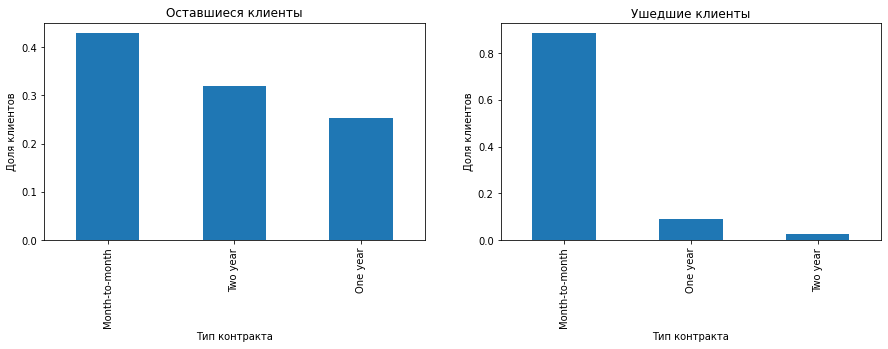

In [70]:
print()
print('Распределение клиентов по типу контракта')
fig = plt.figure(figsize=(15,4))
ax_1 = fig.add_subplot(1,2, 1)
plt.title('Оставшиеся клиенты')
df.query('churn != 1')['Type'].value_counts(normalize=True).plot.bar()
plt.xlabel('Тип контракта')
plt.ylabel('Доля клиентов')
ax_2 = fig.add_subplot(1, 2, 2)
plt.title('Ушедшие клиенты')
df_churn['Type'].value_counts(normalize=True).plot.bar()

plt.xlabel('Тип контракта')
plt.ylabel('Доля клиентов');

Видно, что среди ушедших клиентов в 2 раза выше доля ежемясячных контрактов, это очень существенный фактор.


Распределение клиентов по способу оплаты


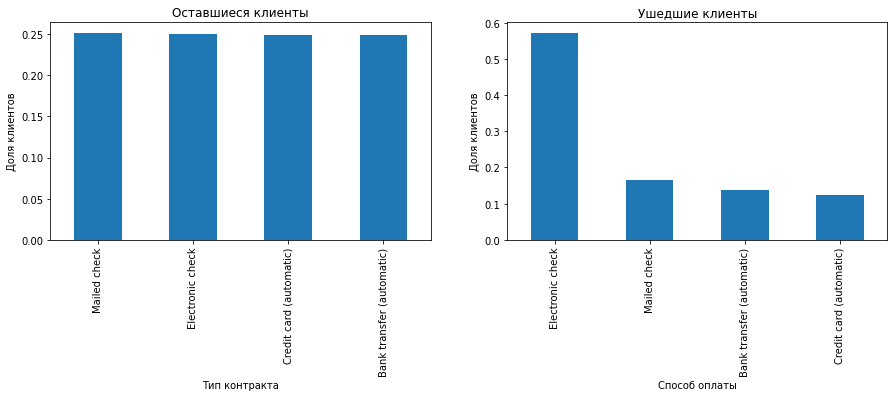

In [71]:
print()
print('Распределение клиентов по способу оплаты')
fig = plt.figure(figsize=(15,4))
ax_1 = fig.add_subplot(1,2, 1)
plt.title('Оставшиеся клиенты')
df.query('churn != 1')['PaymentMethod'].value_counts(normalize=True).plot.bar()
plt.xlabel('Тип контракта')
plt.ylabel('Доля клиентов')
ax_2 = fig.add_subplot(1, 2, 2)
plt.title('Ушедшие клиенты')
df_churn['PaymentMethod'].value_counts(normalize=True).plot.bar()

plt.xlabel('Способ оплаты')
plt.ylabel('Доля клиентов');

По большей части уходят клиенты оплачивающие самостоятельно онлайн, значительно меньше уходят клиенты настроившие автоматическую оплату со счета или карты, и отправляющие чеки по почте.


Распределение клиентов по типу интернет связи


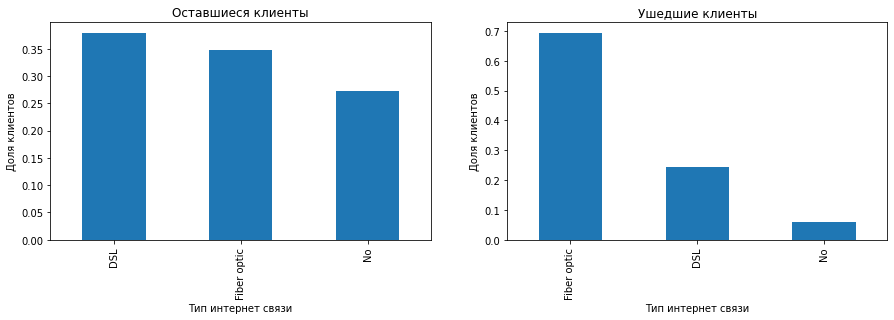

In [72]:
print()
print('Распределение клиентов по типу интернет связи')
fig = plt.figure(figsize=(15,4))
ax_1 = fig.add_subplot(1,2, 1)
plt.title('Оставшиеся клиенты')
df.query('churn != 1')['InternetService'].value_counts(normalize=True).plot.bar()
plt.xlabel('Тип интернет связи')
plt.ylabel('Доля клиентов')
ax_2 = fig.add_subplot(1, 2, 2)
plt.title('Ушедшие клиенты')
df_churn['InternetService'].value_counts(normalize=True).plot.bar()

plt.xlabel('Тип интернет связи')
plt.ylabel('Доля клиентов');

Клиенты с DSL уходят значительно реже, чем использующие оптоволокно


Распределение клиентов по полу


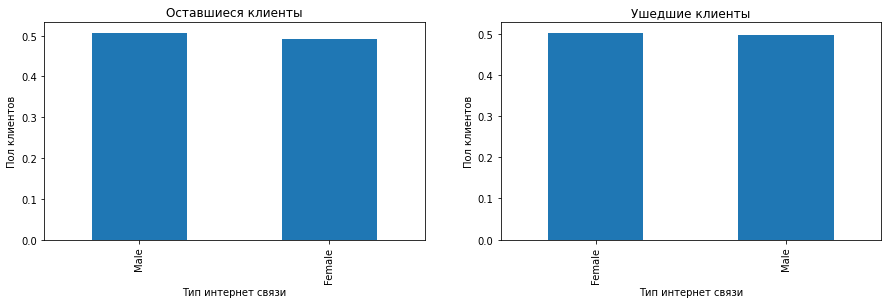

In [73]:
print()
print('Распределение клиентов по полу')
fig = plt.figure(figsize=(15,4))
ax_1 = fig.add_subplot(1,2, 1)
plt.title('Оставшиеся клиенты')
df.query('churn != 1')['gender'].value_counts(normalize=True).plot.bar()
plt.xlabel('Тип интернет связи')
plt.ylabel('Пол клиентов')
ax_2 = fig.add_subplot(1, 2, 2)
plt.title('Ушедшие клиенты')
df_churn['gender'].value_counts(normalize=True).plot.bar()

plt.xlabel('Тип интернет связи')
plt.ylabel('Пол клиентов');

Клиентов разного пола примерно одинаковое количество, при этом не видно явного влияния пола на уход клиентов

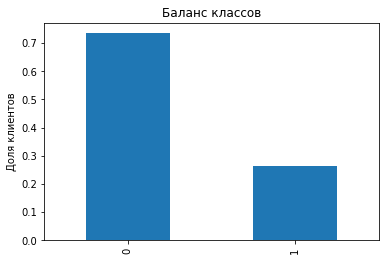

In [74]:
plt.title('Баланс классов')
df['churn'].value_counts(normalize=True).plot.bar()
plt.ylabel('Доля клиентов');

Из графика видим, что присутствует дисбаланс классов, соотношение 74% на 26%. Используем метод по взвешиванию классов для устранения дисбаланса, используем аргумент class_weight при обучении

### Вывод:

Профиль клиента, который может потенциально уйти:  
- без детей и партнера
- пользуется интернетом с оптоволокном
- ежемесячный контракт
- получает счет не на бумаге
- пенсионер
- большой ежемесячный платеж
- платит каждый месяц онлайн
- обслуживается недавно
- не пользуется OnlineSecurity

Можно выделить несущественные и лишние параметры:
- TotalCharges
- MultipleLines
- OnlineBackup
- DeviceProtection
- StreamingTV
- StreamingMovies

Наиболее существенным факторов является цена услуг

<b>План работы:</b>

- подготовка признаков: удаление лишних, разделение не таргет и фичи
- разделение на обучающую и тестовую выборки
- обработка категориальных признаков
- масштабирование признаков
- обучение моделей
- анализ моделей

## Подготовка признаков

Удалим лишние признаки

In [75]:
fg = fg.drop(['TotalCharges','is_internet_user', 'is_phone_user', 'BeginDate',  'EndDate'], axis=1)

Разделим на цель и признаки:

In [76]:
X = fg.drop(['churn'], axis=1)
y = fg['churn']

Разделим признаки по типам данных, для дальнейшей обработки.

In [77]:
num_col = ['MonthlyCharges', 'tenure']
cat_col = ['Type', 'PaperlessBilling', 'PaymentMethod', 
           'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'SeniorCitizen', 'Partner', 'Dependents', 'gender']

In [78]:
cat_col, num_col

(['Type',
  'PaperlessBilling',
  'PaymentMethod',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'gender'],
 ['MonthlyCharges', 'tenure'])

Разделим на обучающую, тестовую и валидационную выборки:

In [79]:
y_train, y_valid, X_train, X_valid = train_test_split(y, X, test_size=0.4, random_state=42, stratify=y)
y_valid, y_test, X_valid, X_test = train_test_split(y_valid, X_valid, test_size=0.5, random_state=42, stratify=y_valid)

In [80]:
len(df)

7043

In [81]:
len(X_train) + len(X_valid) + len(X_test), len(X_train), len(X_valid), len(X_test)

(7043, 4225, 1409, 1409)

Разделение прошло успешно

Обработаем категориальные признаки для логистической регрессии:

In [82]:
fg_ohe = pd.get_dummies(fg, drop_first=True)

In [83]:
fg_ohe.head(3)

,MonthlyCharges,SeniorCitizen,churn,tenure,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,29.85,0,0,31,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5575-GNVDE,56.95,0,0,1036,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3668-QPYBK,53.85,0,1,61,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0


In [84]:
X_ohe = fg_ohe.drop(['churn'], axis=1)
y_ohe = fg_ohe['churn']

In [85]:
y_train_ohe, y_valid_ohe, X_train_ohe, X_valid_ohe = train_test_split(y_ohe, X_ohe,
                                                     test_size=0.4, random_state=42, stratify=y_ohe)
y_valid_ohe, y_test_ohe, X_valid_ohe, X_test_ohe = train_test_split(y_valid_ohe, X_valid_ohe,
                                                     test_size=0.5, random_state=42, stratify=y_valid_ohe)

In [86]:
len(y_ohe), len(y_train_ohe), len(y_valid_ohe)

(7043, 4225, 1409)

Масштабирование признаков

In [87]:
scaler = StandardScaler()
scaler.fit(X_train_ohe[num_col])

StandardScaler()

In [88]:
X_train_ohe[num_col] = scaler.transform(X_train_ohe[num_col])
X_valid_ohe[num_col] = scaler.transform(X_valid_ohe[num_col])
X_test_ohe[num_col]  = scaler.transform(X_test_ohe[num_col])

## Обучение моделей

Обучим 2 модели градиентного бустинга Catboost, LightGBM и  логистическую регрессию. В качестве основной метрики будем использовать AUC-ROC и дополнительно рассчитаем accuracy

<b>CatBoost</b>

In [89]:
params = {
    'learning_rate': 0.05,
    'auto_class_weights': 'Balanced',
    'eval_metric': 'AUC',
    'num_boost_round': 1000,
    'random_state': 42
}

In [90]:
CatBoost_model = CatBoostClassifier(**params)
CatBoost_model.fit(X_train, y_train, cat_features=cat_col, eval_set=(X_valid, y_valid), 
             verbose=50)

0:	test: 0.8285437	best: 0.8285437 (0)	total: 61.6ms	remaining: 1m 1s
50:	test: 0.8675192	best: 0.8675192 (50)	total: 508ms	remaining: 9.45s
100:	test: 0.8734571	best: 0.8735707 (96)	total: 918ms	remaining: 8.17s
150:	test: 0.8777842	best: 0.8777842 (150)	total: 1.33s	remaining: 7.51s
200:	test: 0.8837544	best: 0.8838707 (198)	total: 1.79s	remaining: 7.12s
250:	test: 0.8909724	best: 0.8910086 (249)	total: 2.32s	remaining: 6.92s
300:	test: 0.8965744	best: 0.8965744 (300)	total: 2.87s	remaining: 6.65s
350:	test: 0.9022450	best: 0.9022450 (350)	total: 3.56s	remaining: 6.58s
400:	test: 0.9078044	best: 0.9078044 (400)	total: 4.09s	remaining: 6.11s
450:	test: 0.9102302	best: 0.9102767 (446)	total: 4.6s	remaining: 5.6s
500:	test: 0.9129169	best: 0.9129169 (500)	total: 5.12s	remaining: 5.09s
550:	test: 0.9143300	best: 0.9143300 (550)	total: 5.64s	remaining: 4.59s
600:	test: 0.9153840	best: 0.9156165 (589)	total: 6.17s	remaining: 4.09s
650:	test: 0.9165388	best: 0.9165853 (647)	total: 6.7s	rema

<b>LightGBM</b>

In [92]:
X_train[cat_col] = X_train[cat_col].astype('category')
X_valid[cat_col] = X_valid[cat_col].astype('category')
X_test[cat_col]  = X_test[cat_col].astype('category')

In [93]:
params = {
    'learning_rate': 0.1,
    'class_weight': 'balanced',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'early_stopping_rounds': 50,
    'objective': 'binary',
    'num_boost_round': 1000
}

In [94]:
start_time = datetime.now()

lgb_model = LGBMClassifier(**params)
lgb_model.fit(X_train, y_train,
              eval_set = [(X_train, y_train), (X_valid, y_valid)],
              categorical_feature=cat_col,
              verbose= 50
             )

train_time = datetime.now() - start_time

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
[50]	training's auc: 0.951877	valid_1's auc: 0.893988
[100]	training's auc: 0.981045	valid_1's auc: 0.902


<b>LogisticRegression</b>

In [95]:
param_grid = {'C': [0.1,1,10,100],
     'solver':['liblinear', 'lbfgs'],
     'max_iter':[100,500]}

model = LogisticRegression(random_state=12345, class_weight='balanced')

lr = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv = 5)
lr.fit(X_train_ohe, y_train_ohe)

predictions_valid = lr.predict(X_valid_ohe)
probabilities_valid = lr.predict_proba(X_valid_ohe)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y_valid_ohe, probabilities_one_valid)

print(lr.best_params_)
print('ROC-AUC:', auc_roc)

{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
ROC-AUC: 0.857538298586892


Лучший результат у модели на CatBoost ROC-AUC = 0.9230541

## Анализ моделей

Проверим модели на тестовой выборке.

In [97]:
def test(model):
    predictions_test = model.predict(X_test)
    probabilities_test = model.predict_proba(X_test)
    probabilities_one_test = probabilities_test[:, 1]

    roc_auc = roc_auc_score(y_test, probabilities_one_test)
    accuracy = accuracy_score(y_test, predictions_test)

    print('ROC-AUC:', roc_auc)
    print('Accuracy:', accuracy)

<b>CatBoost</b>

In [98]:
test(CatBoost_model)

ROC-AUC: 0.9039344855201632
Accuracy: 0.8481192334989354


<b>LightGBM</b>

In [99]:
test(lgb_model)

ROC-AUC: 0.8865470562401507
Accuracy: 0.8055358410220014


<b>LogisticRegression</b>

In [100]:
predictions_test = lr.predict(X_test_ohe)
probabilities_test = lr.predict_proba(X_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

roc_auc = roc_auc_score(y_test_ohe, probabilities_one_test)
accuracy = accuracy_score(y_test_ohe, predictions_test)

print('ROC-AUC:', roc_auc)
print('Accuracy:', accuracy)

ROC-AUC: 0.8301945284042469
Accuracy: 0.7416607523066004


Лучший результат на тестовой выборке показала модель CatBoost:  
- ROC-AUC: 0.9039344855201632
- Accuracy: 0.8481192334989354

In [101]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

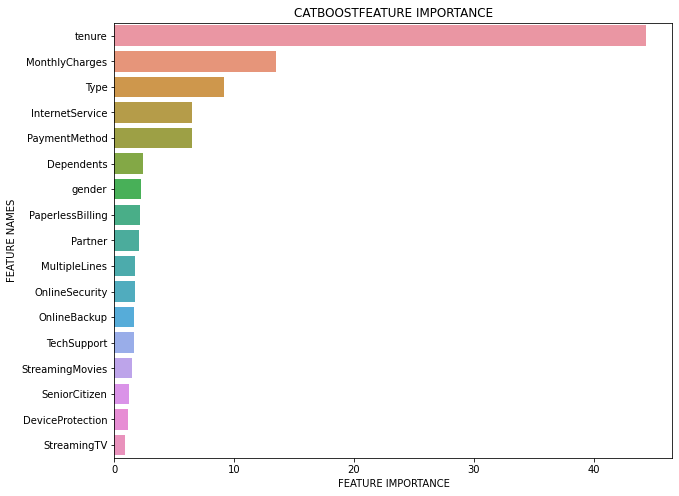

In [102]:
plot_feature_importance(CatBoost_model.get_feature_importance(),X_train.columns,'CATBOOST')

Из графика видно, что самым значимым фактором является врямя жизни клиента, за ним с существенным отставанием: сумма контракта, срок контракта, тип интернет соединения,  метод оплаты.  
Остальные признаки признаки влияют значительно меньше.  
При этом при их удалении качество модели снижается, уже эксперементировал.

## Отчет

Были выполнены все пункты плана:
- подготовлены признаки для моделей:
    - удалены лишние,
    - отделен целевой признак,
    - разделены на 3 выборки: обучающую, валидационную и тестовую,
    - для логистической регрессии категориальные признаки обработаны OHE и масштабированы,
- обучены 3 модели ML с подбором гиперпараметров: <b>Catboost, LightGBM, LogisticRegression</b>, в качестве метрики использована AUC-ROC,
- модели были проверены на тестовой выборке,
- изучена важность признаков для модели.

Возникла сложность с достижением необходимой метрики.  
В анализе я поменял yes/no у признаков на 1/0, и при построении модели ROC-AUC на валидационной получалось максимум 0,82.
Замена типа данных у этих признаков на bool или str никак не улучшали результат. Эксперименты с другими методам при этом давали лишь небольшие изменения.  
Когда я решил оставить Yes/No в признаках как есть, удалось получить существенный прирост ROC-AUC.  
Добавление признака отражающего количество сервисов только снизило метрику.
Удаление казалось бы неважных признаков также не увеличивало качество модели.

Выделю 2 ключевых шага:  

Выбор модели - у нас много категориальных признаков, известно, что это сильная сторона Catboost, 2 другие были взяты для сравнения  

Подготовка признаков, как оказалось именно это сыграло решающую роль:
- важно было удалить лики данных, колонки с датами,
- создать признак срок жизни клиента,
- не менять данные в категориальных признаках.

Лучший результат на тестовой выборке показала модель CatBoost:  
- ROC-AUC: 0.9039344855201632
- Accuracy: 0.8481192334989354